<a href="https://colab.research.google.com/github/Abhinavmandve/Rossman_Store_Sales/blob/main/Heart_Disease_Dataset_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# URL for the CSV file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

# Load the dataset from the URL
heart_df = pd.read_csv(url, header=None)

# Add column names to the dataframe
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_df.columns = column_names

In [3]:
# Check the first few rows of the dataset
heart_df.head()
print(heart_df.head())

# Check the dimensions of the dataset
heart_df.shape

# Check the data types of the features
heart_df.info()

# Check the summary statistics of the features
heart_df.describe()

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-n

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


<Axes: xlabel='target', ylabel='count'>

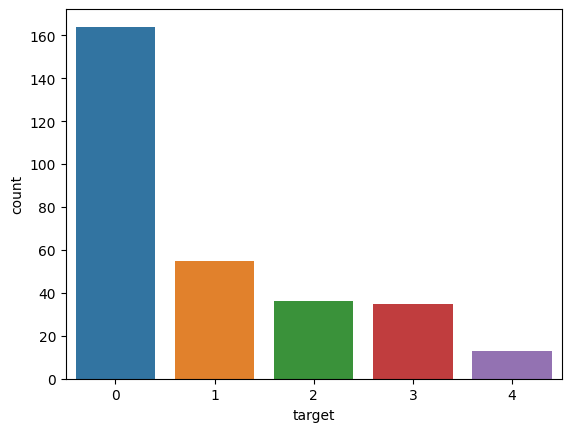

In [4]:
# Check the distribution of the target variable
sns.countplot(x='target', data=heart_df)

<Axes: >

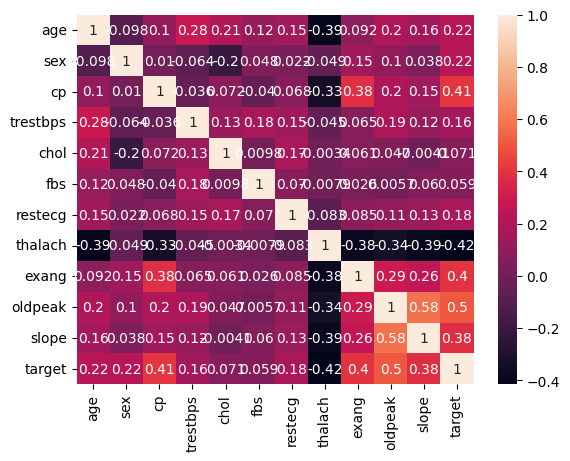

In [5]:
# Check the correlation matrix of the features
corr_matrix = heart_df.corr()
sns.heatmap(corr_matrix, annot=True)

<Axes: xlabel='age', ylabel='Count'>

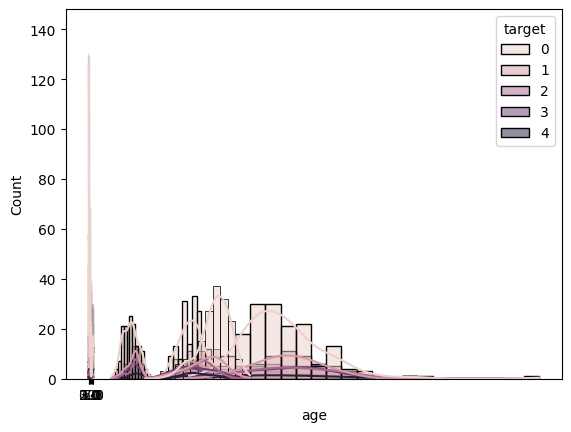

In [6]:
# Check the distribution of each feature
sns.histplot(data=heart_df, x='age', hue='target', kde=True)

sns.histplot(data=heart_df, x='sex', hue='target', kde=True)

sns.histplot(data=heart_df, x='cp', hue='target', kde=True)

sns.histplot(data=heart_df, x='trestbps', hue='target', kde=True)

sns.histplot(data=heart_df, x='chol', hue='target', kde=True)

sns.histplot(data=heart_df, x='fbs', hue='target', kde=True)

sns.histplot(data=heart_df, x='restecg', hue='target', kde=True)

sns.histplot(data=heart_df, x='thalach', hue='target', kde=True)

sns.histplot(data=heart_df, x='exang', hue='target', kde=True)

sns.histplot(data=heart_df, x='oldpeak', hue='target', kde=True)

sns.histplot(data=heart_df, x='slope', hue='target', kde=True)

sns.histplot(data=heart_df, x='ca', hue='target', kde=True)

sns.histplot(data=heart_df, x='thal', hue='target', kde=True)

In [7]:
print(heart_df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
# Drop rows with missing values
heart_df.dropna(inplace=True)

# Split the data into features and target
X = heart_df.drop(['target'], axis=1)
y = heart_df['target']

# Separate features and target
#X = heart_df.iloc[:, :-1]
#y = heart_df.iloc[:, -1]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Replace missing values with the median of the column
X_train = X_train.replace('?', np.nan)
X_train = X_train.apply(lambda x: x.fillna(x.median()),axis=0)
X_test = X_test.replace('?', np.nan)
X_test = X_test.apply(lambda x: x.fillna(x.median()),axis=0)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Evaluate the logistic regression model
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5409836065573771
Precision (macro): 0.3152777777777778
Recall (macro): 0.3308976464148878
F1-Score (macro): 0.3170415108810277
Confusion Matrix:
 [[26  1  2  0  0]
 [ 3  3  3  3  0]
 [ 2  1  2  4  0]
 [ 1  2  2  2  0]
 [ 0  1  0  3  0]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# Train the k-nearest neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
# Evaluate the k-nearest neighbors model
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5573770491803278
Precision (macro): 0.31858054226475274
Recall (macro): 0.31611932129173514
F1-Score (macro): 0.30639691567736765
Confusion Matrix:
 [[28  0  1  0  0]
 [ 6  3  3  0  0]
 [ 2  3  2  1  1]
 [ 1  4  1  1  0]
 [ 1  1  1  1  0]]


In [16]:
# Train the decision tree model

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
# Evaluate the decision tree model

y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.45901639344262296
Precision (macro): 0.30076923076923073
Recall (macro): 0.28639846743295017
F1-Score (macro): 0.28943869689632407
Confusion Matrix:
 [[23  1  4  1  0]
 [ 4  2  6  0  0]
 [ 1  1  2  4  1]
 [ 1  4  1  0  1]
 [ 1  0  0  2  1]]


In [18]:
# Train the random forest model

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Evaluate the random forest model

y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.4918032786885246
Precision (macro): 0.19692307692307692
Recall (macro): 0.23199233716475098
F1-Score (macro): 0.20955436720142603
Confusion Matrix:
 [[28  0  1  0  0]
 [ 7  1  3  1  0]
 [ 3  2  1  3  0]
 [ 1  5  1  0  0]
 [ 0  2  0  2  0]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
#Plot the feature importance of the random forest model
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

<Axes: xlabel='Importance', ylabel='Feature'>

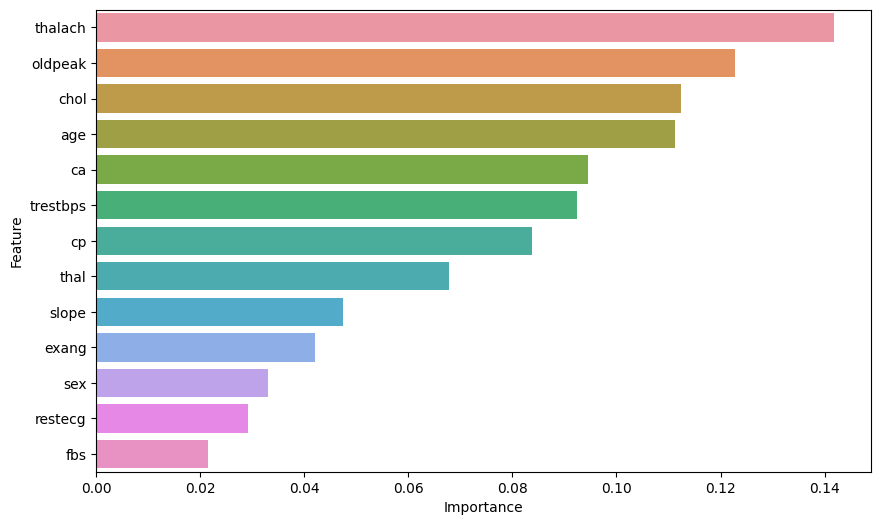

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)